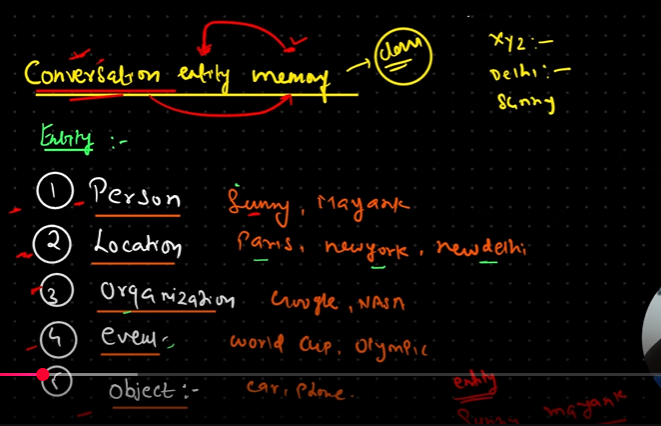

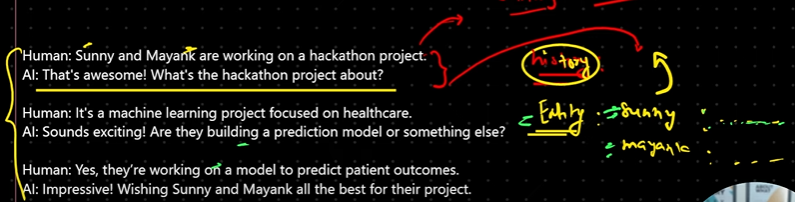

ConversationEntityMemory is a memory class provided by LangChain, designed to track and store information about entities that arise in a conversation. It allows the AI to "remember" key facts about people, places, or concepts mentioned during a conversation, so it can refer back to them later on, improving the conversational experience.

Key Features:

Entity Tracking: It identifies entities (e.g., names, places, concepts) and stores relevant information about them. For instance, if you mention "Tanmay" in one part of a conversation, it can remember details about "Tanmay" for later reference.

Context-Aware: It helps the AI maintain context by remembering details about the entities mentioned during the chat, ensuring more natural, fluid conversations over time.

Customization: You can customize what to store and how to retrieve it during future interactions.

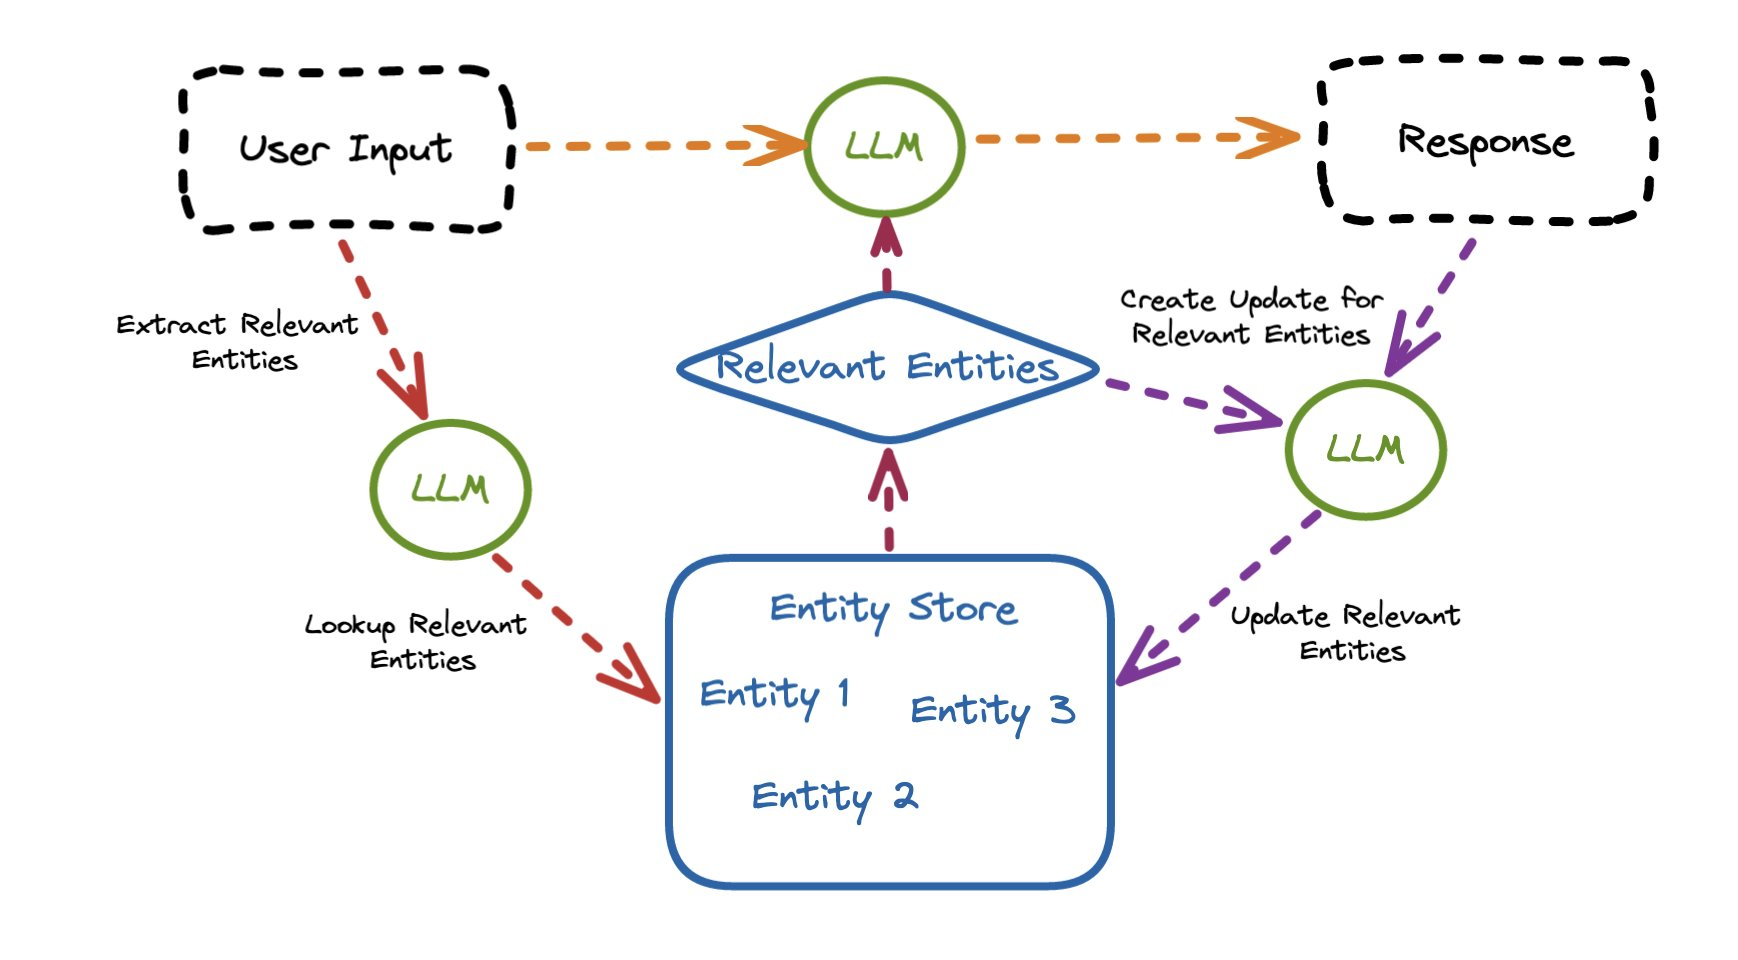

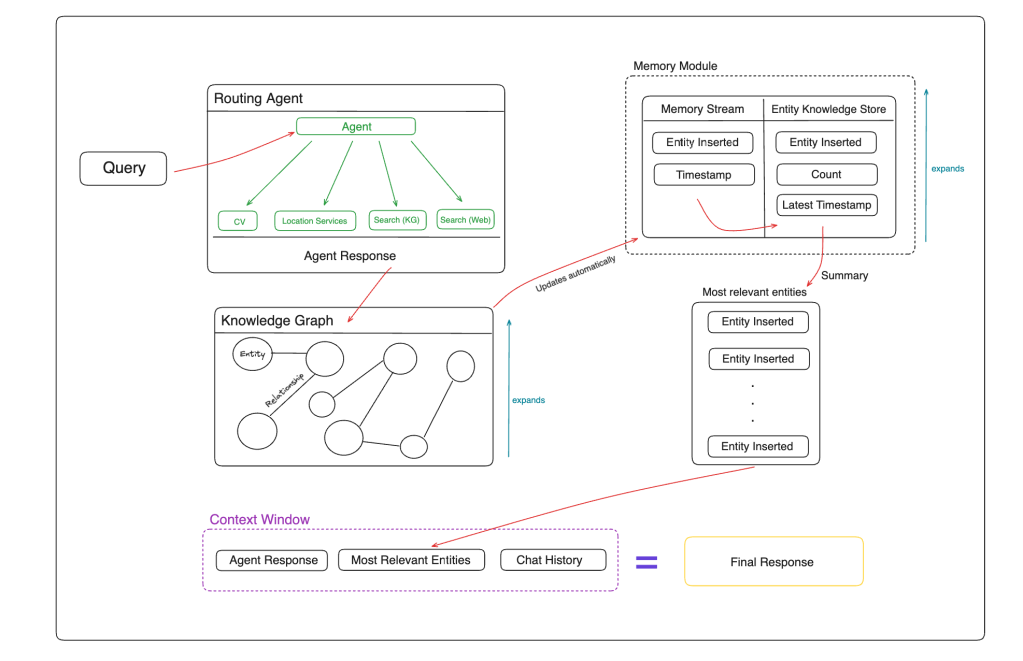

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
GOOGLE_API_KEY=os.getenv('GEMINI_API_KEY')
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [2]:

from langchain_google_genai import ChatGoogleGenerativeAI

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = ChatGoogleGenerativeAI(model="gemini-1.0-pro",convert_system_message_to_human=True)

In [8]:
model

ChatGoogleGenerativeAI(model='models/gemini-1.0-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001EFEA914F10>, default_metadata=(), convert_system_message_to_human=True)

In [4]:
print(model.invoke("hi").content)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Hello there! How can I assist you today?


In [5]:
from langchain.memory import ConversationEntityMemory

In [6]:
memory = ConversationEntityMemory(llm=model)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12928\1182818481.py:1: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationEntityMemory(llm=model)
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\pydantic\main.py:212: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  validated_self = self.__pydantic_validator__.validate_python(data, self_instance=self)


In [7]:
memory

ConversationEntityMemory(chat_memory=InMemoryChatMessageHistory(messages=[]), llm=ChatGoogleGenerativeAI(model='models/gemini-1.0-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001EFEA914F10>, default_metadata=(), convert_system_message_to_human=True), entity_store=InMemoryEntityStore(store={}))

In [9]:
_input= {"input": "i am very hungry."}
memory.load_memory_variables(_input)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'history': '', 'entities': {}}

In [10]:
_input= {"input": "sunny & mayank are working on a hackathon project"}
memory.load_memory_variables(_input)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'history': '', 'entities': {'sunny': '', 'mayank': ''}}

In [11]:

_input= {"input": "My name is John, and I'm planning a trip to Paris."}
memory.load_memory_variables(_input)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'history': '', 'entities': {'John': '', 'Paris': ''}}

In [12]:

_input= {"input": "Sunny is a great person who values gratitude."}
memory.load_memory_variables(_input)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'history': '', 'entities': {'Sunny': ''}}

In [13]:
memory.save_context(
    {"Human": "Sunny and Mayank are working on a hackathon project"},
    {"AI": "That's awesome! What's the hackathon project about?"}
)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


In [14]:
memory

ConversationEntityMemory(chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Sunny and Mayank are working on a hackathon project', additional_kwargs={}, response_metadata={}), AIMessage(content="That's awesome! What's the hackathon project about?", additional_kwargs={}, response_metadata={})]), llm=ChatGoogleGenerativeAI(model='models/gemini-1.0-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x000001EFEA914F10>, default_metadata=(), convert_system_message_to_human=True), entity_cache=['Sunny'], entity_store=InMemoryEntityStore(store={'Sunny': 'Sunny is working on a hackathon project with Mayank.'}))

In [15]:

memory.load_memory_variables({"input": "who is Sunny?"})

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'history': "Human: Sunny and Mayank are working on a hackathon project\nAI: That's awesome! What's the hackathon project about?",
 'entities': {'Sunny': 'Sunny is working on a hackathon project with Mayank.'}}

In [16]:
memory.save_context(
    {"Human": "It's a machine learning project focused on healthcare."},
     {"AI": "Sounds exciting! Are they building a prediction model or something else?"}
)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


In [17]:
memory.save_context(
    {"Human": "Yes, they are building prediction model."},
    {"AI": "Wishing Sunny and Mayank all the best for their project!"}
)

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


In [18]:
memory.load_memory_variables({"input": "who is Sunny?"})

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


{'history': "Human: Sunny and Mayank are working on a hackathon project\nAI: That's awesome! What's the hackathon project about?\nHuman: It's a machine learning project focused on healthcare.\nAI: Sounds exciting! Are they building a prediction model or something else?\nHuman: Yes, they are building prediction model.\nAI: Wishing Sunny and Mayank all the best for their project!",
 'entities': {'Sunny': 'Sunny is working on a machine learning prediction model focused on healthcare for a hackathon with Mayank.'}}

In [19]:
from langchain.chains import ConversationChain
from langchain.memory import ConversationEntityMemory
from langchain.memory.prompt import ENTITY_MEMORY_CONVERSATION_TEMPLATE
from pydantic import BaseModel
from typing import List, Dict, Any

In [20]:
conversation = ConversationChain(
    llm=model,
    verbose=True,
    prompt=ENTITY_MEMORY_CONVERSATION_TEMPLATE,
    memory=ConversationEntityMemory(llm=model)
)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_12928\2685706177.py:1: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  conversation = ConversationChain(


In [21]:
conversation.predict(input="Deven & Sam are working on a hackathon project")

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")




> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



> Finished chain.


"That's great! What kind of project are they working on?"

In [22]:
conversation.memory.entity_store.store

{'Deven': 'Deven is working on a hackathon project with Sam.',
 'Sam': 'Sam is working on a hackathon project with Deven.'}

In [23]:
conversation.predict(input="They are trying to add more complex memory structures to Langchain")

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")




> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



> Finished chain.


"That sounds like a very interesting project! Langchain is a very powerful tool, and adding more complex memory structures could open up a lot of new possibilities. I'm sure Deven and Sam will do a great job."

In [24]:
conversation.predict(input="They are adding in a key-value store for entities mentioned so far in the conversation.")

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")




> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



> Finished chain.


"That's a great idea! A key-value store would allow Langchain to keep track of important information that has been mentioned in previous conversations, which could be very useful for tasks such as question answering and dialogue generation. I'm sure Deven and Sam will be able to implement this feature in a way that is both efficient and effective."

In [25]:
conversation.predict(input="What do you know about Deven & Sam?")

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")




> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



> Finished chain.


"I know that Deven and Sam are working on a hackathon project together. They are trying to add more complex memory structures to Langchain, including a key-value store for entities mentioned so far in the conversation. I think this is a great idea, as it could open up a lot of new possibilities for Langchain. I'm sure Deven and Sam will do a great job!"

In [26]:

from pprint import pprint
pprint(conversation.memory.entity_store.store)

{'Deven': 'Deven is working on a hackathon project with Sam to add more '
          'complex memory structures to Langchain, including a key-value store '
          'for entities mentioned so far in the conversation.',
 'Langchain': 'Langchain is a powerful tool that Deven and Sam are trying to '
              'add more complex memory structures to.',
 'Sam': 'Sam is working on a hackathon project with Deven to add more complex '
        'memory structures to Langchain, including a key-value store for '
        'entities mentioned so far in the conversation.'}


In [27]:
conversation.predict(input="Sam is the founder of a company called Daimon.")

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")




> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



> Finished chain.


"That's very interesting! I did not know that Sam was the founder of Daimon. I'm not familiar with Daimon, but I'm sure it's a great company. I'm always impressed by people who are passionate about their work and who are willing to put in the time and effort to make their dreams a reality. I'm sure Sam is one of those people."

In [28]:

from pprint import pprint
pprint(conversation.memory.entity_store.store)  

{'Daimon': 'Daimon is a company founded by Sam.',
 'Deven': 'Deven is working on a hackathon project with Sam to add more '
          'complex memory structures to Langchain, including a key-value store '
          'for entities mentioned so far in the conversation.',
 'Langchain': 'Langchain is a powerful tool that Deven and Sam are trying to '
              'add more complex memory structures to.',
 'Sam': 'Sam is working on a hackathon project with Deven to add more complex '
        'memory structures to Langchain, including a key-value store for '
        'entities mentioned so far in the conversation.'}


In [29]:

conversation.predict(input="What do you know about Sam?")

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")




> Entering new ConversationChain chain...
Prompt after formatting:
You are an assistant to a human, powered by a large language model trained by OpenAI.

You are designed to be able to assist with a wide range of tasks, from answering simple questions to providing in-depth explanations and discussions on a wide range of topics. As a language model, you are able to generate human-like text based on the input you receive, allowing you to engage in natural-sounding conversations and provide responses that are coherent and relevant to the topic at hand.

You are constantly learning and improving, and your capabilities are constantly evolving. You are able to process and understand large amounts of text, and can use this knowledge to provide accurate and informative responses to a wide range of questions. You have access to some personalized information provided by the human in the Context section below. Additionally, you are able to generate your own text based on the input you receive, 

d:\a27_YEARS_OLD\RAG_ranking\venv\Lib\site-packages\langchain_google_genai\chat_models.py:310: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



> Finished chain.


"I know that Sam is working on a hackathon project with Deven. They are trying to add more complex memory structures to Langchain, including a key-value store for entities mentioned so far in the conversation. I think this is a great idea, as it could open up a lot of new possibilities for Langchain. I'm sure Deven and Sam will do a great job!"